In [12]:
import numpy as np
import matplotlib.pyplot as plt

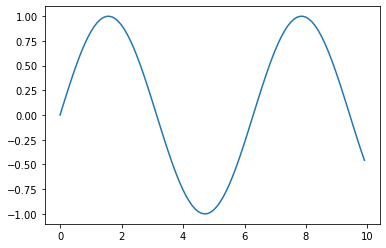

In [60]:
#The variabels of the program 
data_len = 100
train_data_len = 70
test_data_len = 30
num_weights = 35
learning_rate = 0.01
variance = 1
epochs = 100
error_val = []
point_range = data_len/10
x = np.arange(0,point_range,0.1)
y = np.sin(x)
plt.plot(x,y)
plt.savefig("Function.jpg")
# plt.show()

In [57]:
def sort_list(data):
    data = np.hsplit(data,2)
    unsorted_list = data[0]
    unsorted_list_temp = []
    for item in unsorted_list:
        unsorted_list_temp.append(item[0])
    sorted_list_temp = unsorted_list_temp
    sorted_list_temp.sort()
    unsorted_list_1 = data[1]
    list_temp = []
    for item in unsorted_list_1:
        list_temp.append(item[0])
    unsorted_list_1 = list_temp
    sorted_list = []
    for item in sorted_list_temp:
        index = np.where(unsorted_list == item)
        sorted_list.append([item,unsorted_list_1[index[0][0]]])
    
    return np.array(sorted_list)

def apend_values(data_size,train_index):
    index = []
    data = []
    for i in range(data_size):
        if i not in train_index:
            index.append(i)
            data.append([x[i],y[i]])
    data = np.array(data)
    index = np.array(index)
    return index,data
    
training_data = []
training_index = []
testing_data = []
testing_index = []
while (len(training_index) < train_data_len):
#     print("Populating the data ")
    random_index = np.random.randint(100)
    if random_index not in training_index:
#         print("appending the value")
        training_index.append(random_index)
        training_data.append([x[random_index],y[random_index]])
#         print(np.shape(training_data))
# print(np.shape(training_data))
training_data = np.asarray(training_data)
training_index = np.asarray(training_index)
# print(np.shape(training_data))
training_data = sort_list(training_data)
testing_index,testing_data = apend_values(data_len,training_index)
# testing_data = np.array(testing_data)
# print(np.shape(training_data))
# print(testing_data.shape)
# print(testing_data[0])
# print(training_data[10][0])
# print(len(training_data),len(training_index),len(testing_data),len(testing_index))

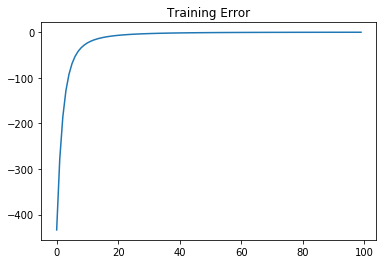

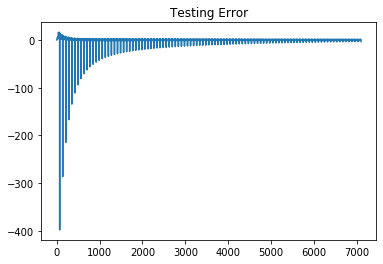

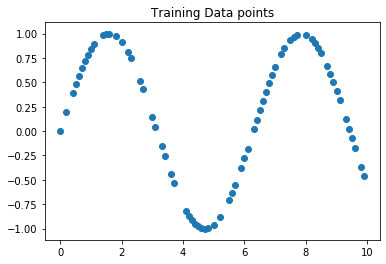

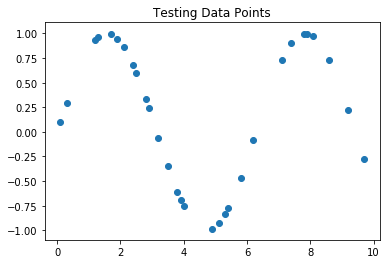

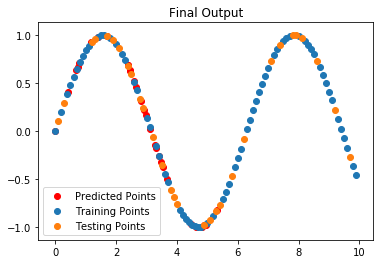

In [59]:
# Function to consolidate the 
def weights_update(train_data, range_len, weights):
    ratio = train_data/range_len
    weights_index = weights*ratio
    weights_index = int(weights_index)
    weights_list = []
    weights_list.append(weights_index)
    return weights_list, weights_index

weights = []
for i in range((num_weights)):
    weights.append(float(np.random.randint(100))/100)
    
train_error = []
test_error = []
test_pred_pts = []
for i in range(epochs):
    train_error_temp = []
    prediction_error = []
    for indexes in range(training_data.shape[0]):
        train_input = training_data[indexes][0]
        train_out = training_data[indexes][1]
        weights_list,weights_index = weights_update(train_input,point_range,num_weights)
        for j in range(1,variance+1):
            if ((weights_index+j)<(num_weights-1)):
                weights_list.append(weights_index+j)
            if ((weights_index-j)>0):
                weights_list.append(weights_index-j)
        weights_list.sort()
        output = 0
        #Forward pass 
        for weights_in in weights_list:
            output = output + weights[weights_in]*train_input
        #Error Calculation
        error = train_out-output
        train_error_temp.append(error)
        test_error.append(output)
        
        for weights_in in weights_list:
            weights[weights_in] = weights[weights_in]+error*learning_rate/len(weights_list)
    train_error.append(sum(train_error_temp))
    ##############################################################3
      # For the testing error
    testing_error_temp =[]
    prediction_error = []
#     print(testing_data.shape[0])
    for test_in in range(testing_data.shape[0]):
        test_inp = testing_data[test_in][0]
        test_out = testing_data[test_in][1]
        ratio = test_inp/point_range
        test_weights_index = num_weights*ratio
        test_weights_index = int(test_weights_index)
        test_weights_list = []
        test_weights_list.append(test_weights_index)
        for l in range(1,variance+1):
#             print(l,variance)
            if ((test_weights_index+l)<(num_weights-1)):
                test_weights_list.append(test_weights_index+l)
#                 print(test_weights_index)
            if (test_weights_index-l)>0:
#                 print(test_weights_index)
                test_weights_list.append(test_weights_index-l)
        test_weights_list.sort()
#         print(np.shape(test_weights_list), len(weights))
        output = 0
#         print(len(weights))
        for weights_in in test_weights_list:
#             print(weights_in)
            output = output + weights[weights_in]*test_in
#             output = output+weights[weights_in]
        
        error = test_out-output
        testing_error_temp.append(error)
        prediction_error.append(output)
    test_pred_pts.append(prediction_error)
#     test_pred_pts = np.array(test_pred_pts)
    test_error.append(sum(testing_error_temp))
    
#############################################################
#Plotting Functions
plt.title("Training Error")
plt.plot(train_error)
plt.savefig("Discrete_training_error.jpg")
plt.show()

plt.title("Testing Error")
plt.plot(test_error)
plt.savefig("Discrete_testing_error.jpg")
plt.show()
plt.title("Training Data points")
plt.scatter(training_data[:,0],training_data[:,1])
plt.savefig("Discerete_training.jpg")
plt.show()
plt.title("Testing Data Points")
plt.scatter(testing_data[:,0],testing_data[:,1])
plt.savefig("Discrete_testing.jpg")
plt.show()
#Normalize the data for the function
test_pred_pts = np.array(test_pred_pts)
test_pred_pts[1] = test_pred_pts[1]/3.5
plt.title("Final Output")
plt.scatter(test_pred_pts[1],np.sin(test_pred_pts[1]),color ="r",label="Predicted Points")
plt.scatter(training_data[:,0],training_data[:,1],label = "Training Points" )
plt.scatter(testing_data[:,0],testing_data[:,1],label = "Testing Points")
plt.legend()
plt.savefig("Discrete_final.jpg")
plt.show()
